Gradients in Sid's October 10th 3 Ohm Data
=======================

Treating Sid's data the same way I did the July set.

Let's start by importing a bunch of tools that we will use later.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib import cm
import numpy as np

Now we can use pandas to import the spreadsheet and then can extract the columns as individual numpy arrays.

As I found last time, I can't ACTUALLY do this in JupyterLab so I run this code in Spyder and then import into JupyterLab.

In [2]:
data = np.loadtxt('SidOct10th3Ohm.txt')
zv = data[:,0]
yv = data[:,1]
bxv = data[:,2]
byv = data[:,3]
bzv = data[:,4]

Now these are really 2D data so we shall reformat them into 2-D arrays in the mesh format needed by matplotlib. Reading the Excel file tells us that there are 75 z values and 71 y values.

In [3]:
zmesh = zv.reshape((71,75))
ymesh = yv.reshape(((71,75)))
bxmesh = bxv.reshape(((71,75)))
bymesh = byv.reshape(((71,75)))
bzmesh = bzv.reshape(((71,75)))

With them in that format we can generate 2-D plots. Let's look at By and Bz (Bx is boring).

We'll start with Bz.

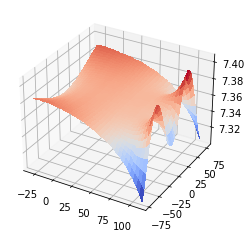

In [4]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(zmesh, ymesh, bzmesh, cmap=cm.coolwarm,linewidth=0, antialiased=False)

Then By.

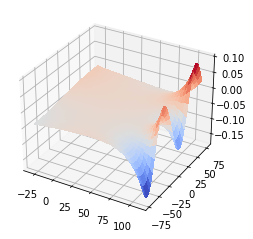

In [5]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(zmesh, ymesh, bymesh, cmap=cm.coolwarm,linewidth=0, antialiased=False)

Those look sensible.

Now our goal is to calculate $(\dfrac{\nabla{}B_{T}}{B_{z}})$ but 

a) we only have values for different y and z

b) we really hope that $B_{x}$ is essentially zero, because of symmetry.

In that case we are going for just dBy/dy and dBy/dbz, which we can approximate with simple first differences.

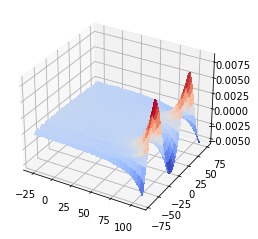

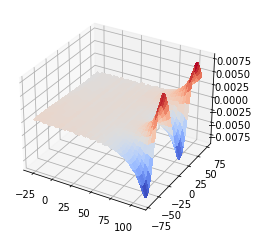

In [8]:
dy = ymesh[1:-1,2:]-ymesh[1:-1,:-2]
dz = zmesh[2:,1:-1]-zmesh[:-2,1:-1]
dbyy = bymesh[1:-1,2:]-bymesh[1:-1,:-2]
dbydy = dbyy / dy
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(zmesh[1:-1,1:-1], ymesh[1:-1,1:-1], dbydy, cmap=cm.coolwarm,linewidth=0, antialiased=False)
dbyz = bymesh[2:,1:-1]-bymesh[:-2,1:-1]
dbydz = dbyz / dz
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
rzmesh = zmesh[1:-1,1:-1]
rymesh = ymesh[1:-1,1:-1]
surf = ax.plot_surface(rzmesh, rymesh, dbydz, cmap=cm.coolwarm,linewidth=0, antialiased=False)

From that we can go to dBy/dy/Bz, and, for good measure, square the thing to get to the figure of merit. Then do the same to dBy/dz/Bz and add to get Figure of Merit.

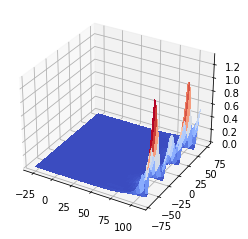

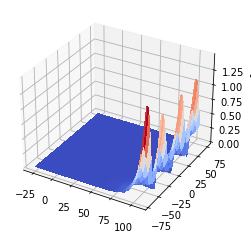

In [10]:
dbyb = dbydy / bzmesh[1:-1,1:-1]
dbybsq = dbyb * dbyb
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(rzmesh, rymesh, dbybsq, cmap=cm.coolwarm,linewidth=0, antialiased=False)
dbzb = dbydz / bzmesh[1:-1,1:-1]
dbzbsq = dbzb * dbzb
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(rzmesh, rymesh, dbzbsq, cmap=cm.coolwarm,linewidth=0, antialiased=False)


and I have no idea why JupyterLab has cut the $\times{}10^{-7}$ off the vertical axis.

No do the figure of merit.

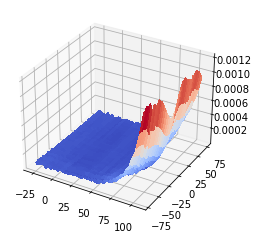

In [11]:
FOM = dbybsq+dbzbsq
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(rzmesh, rymesh, np.sqrt(FOM), cmap=cm.coolwarm,linewidth=0, antialiased=False)

This can then be weighted by the distance from the axis

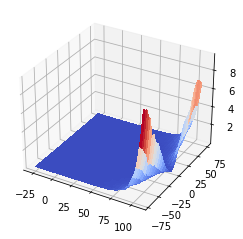

In [13]:
dist = np.abs(rymesh)
wfom = FOM * dist
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(rzmesh, rymesh, wfom, cmap=cm.coolwarm,linewidth=0, antialiased=False)

So the big problems are in those corners, as we would expect.

To get the full figure of merit we have to sum this and then divide by the right weight.

In [14]:
tot = np.sum(wfom)
totweight=np.sum(dist)
print(tot, np.sqrt(tot), totweight,tot/totweight, np.sqrt(tot/totweight))

0.012674595796631875 0.11258150734748525 184018.3705416 6.887679615534146e-08 0.00026244389144223086


which is quite a lot larger than Sid's and Gordon's but not yet the right region.

For this we use the region $-20\le{}z\lt{}60$ (indices 4:-14) and $-70\le{}y\lt{}74$ (full range) because that is what Sid did.

In [26]:
print(rymesh[1,:])

[-6.99990640e+01 -6.79984172e+01 -6.59977704e+01 -6.39971236e+01
 -6.19964768e+01 -5.99958300e+01 -5.79951832e+01 -5.59945364e+01
 -5.39938896e+01 -5.19932428e+01 -4.99925960e+01 -4.79919492e+01
 -4.59913024e+01 -4.39906556e+01 -4.19900088e+01 -3.99893620e+01
 -3.79887152e+01 -3.59880684e+01 -3.39874216e+01 -3.19867748e+01
 -2.99861280e+01 -2.79854812e+01 -2.59848344e+01 -2.39841876e+01
 -2.19835408e+01 -1.99828940e+01 -1.79822472e+01 -1.59816004e+01
 -1.39809536e+01 -1.19803068e+01 -9.97966000e+00 -7.97901320e+00
 -5.97836640e+00 -3.97771960e+00 -1.97707280e+00  2.35740000e-02
  2.02422080e+00  4.02486760e+00  6.02551440e+00  8.02616120e+00
  1.00268080e+01  1.20274548e+01  1.40281016e+01  1.60287484e+01
  1.80293952e+01  2.00300420e+01  2.20306888e+01  2.40313356e+01
  2.60319824e+01  2.80326292e+01  3.00332760e+01  3.20339228e+01
  3.40345696e+01  3.60352164e+01  3.80358632e+01  4.00365100e+01
  4.20371568e+01  4.40378036e+01  4.60384504e+01  4.80390972e+01
  5.00397440e+01  5.20403

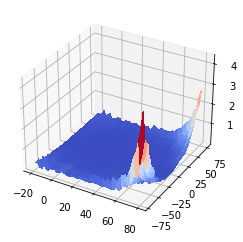

In [27]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(rzmesh[4:-14,:], rymesh[4:-14,:], wfom[4:-14,:], cmap=cm.coolwarm,linewidth=0, antialiased=False)

That looks better. Run the weighted average.

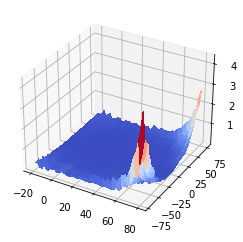

In [28]:
rwfom = FOM[4:-14,:] * dist[4:-14,:]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(rzmesh[4:-14,:], rymesh[4:-14,:], rwfom, cmap=cm.coolwarm,linewidth=0, antialiased=False)

In [30]:
rtot = np.sum(rwfom)
rtotweight=np.sum(dist[4:-14,:])
print(rtot, np.sqrt(rtot), rtotweight,rtot/rtotweight, np.sqrt(rtot/rtotweight))

0.0004329861951509034 0.020808320334685916 136013.5782264 3.1834041924121776e-09 5.642166421164992e-05


So my volume average is $5.6\times{}10^{-5}$ but isn't that /mm??